# Correlation analysis

## Libraries and settings

In [ ]:
# Libraries
import os
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show path to the current working directory
print('Current working directory:', os.getcwd())

## Import the apartment data

In [ ]:
# Define columns
columns = ['web-scraper-order',
            'address_raw',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'rooms', 
            'area', 
            'luxurious', 
            'price', 
            'price_per_m2',
            'pop_dens',
            'frg_pct',
            'mean_taxable_income']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";")[columns]

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

## Scatterplot-matrix

In [ ]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms',
                     'area',
                     'price',
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct',
                     'mean_taxable_income']], 
                 height=0.9, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=8)
g.map_lower(sns.scatterplot, color='darkgreen', s=8)
g.map_diag(plt.hist, color='brown')

## Scatterplots and Pearson correlation of selected variables

### Scatterplot price versus area

In [ ]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['area'], 
         df['price'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price versus area', fontsize=12)
plt.ylabel('price (CHF)', fontsize=12)
plt.xlabel('area (m2)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation price versus area

In [ ]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['area'], df['price'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

### Scatterplot price_per_m2 versus area

In [ ]:
# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['area'], 
         df['price_per_m2'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot price_per_m2 versus area', fontsize=12)
plt.ylabel('price per m2 (CHF)', fontsize=12)
plt.xlabel('area (m2)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation price_per_m2 versus area

In [ ]:
# Perform Persons correlation
res = scipy.stats.pearsonr(df['area'], df['price_per_m2'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

### Log-transform price_per_m2 and area to make the relationship linear

In [ ]:
# Transform values of price_per_m2 to make it linear
df['log_price_per_m2'] = np.log2(df['price_per_m2'])
df['log_area'] = np.log2(df['area'])

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df['log_area'], 
         df['log_price_per_m2'], 
         'o', 
         markersize=3.5,
         color="darkred")

# Add title and axes labels
plt.title('Scatterplot log(price per m2) versus log(area) ', fontsize=12)
plt.ylabel('log(price per m2)', fontsize=12)
plt.xlabel('log(area)', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Pearson correlation log(price_per_m2) versus log(area)

In [ ]:
# Perform Pearson's correlation
res = scipy.stats.pearsonr(df['log_area'], df['log_price_per_m2'])

# Print result
print(f'Persons correlation coefficient (r): {res[0]:.4f}')
print(f'p-value: {res[1]:.4f}')

## Correlation analysis based on car data

### Import car data

In [ ]:
import pandas as pd

# Define columns for import
columns = ['Offer_Id',
          'Type',
          'Init_Regist',
          'Kilometer',
          'Price_Num',
          'PS_Num']

# Read the data and show header info
df_cars = pd.read_csv('autoscout24_data.csv', sep=";")[columns]

# Kilometer to numeric value
df_cars['Kilometer_Num'] = df_cars['Kilometer'].str.replace(' km', '').str.replace('\'', '').astype('int64')

# Remove original column 'Kilometer' 
df_cars = df_cars.drop(columns=['Kilometer'])

# Rename columns
df_cars = df_cars.rename(columns={'Price_Num':'Price', 'PS_Num':'PS', 'Kilometer_Num':'Kilometer'})
print('Number of rows and columns:', df_cars.shape)

# print header info
df_cars

### Aufgabe C)

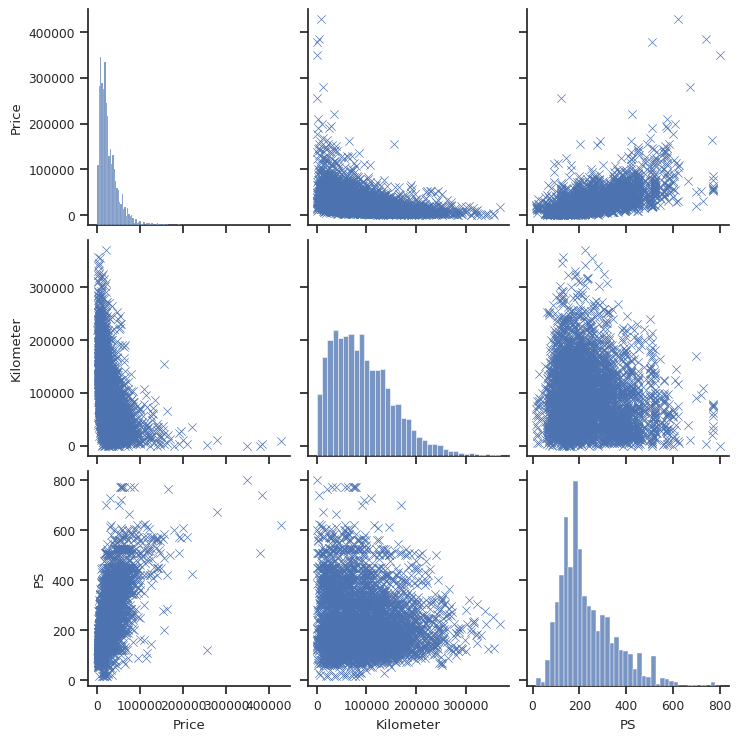

In [13]:
# seaborn pairplot to visualize the relationship between Price, Kilometer, and PS
sns.pairplot(df_cars[['Price', 'Kilometer', 'PS']], markers="x")
plt.show()


### Aufgabe d)

In [14]:
# Correlation between Price and Kilometer
correlation_price_km, p_value_price_km = scipy.stats.pearsonr(df_cars['Price'], df_cars['Kilometer'])
print(f'Correlation Price vs. Kilometer: r = {correlation_price_km:.4f}, p-value = {p_value_price_km:.4f}')

# Correlation between Price and PS
correlation_price_ps, p_value_price_ps = scipy.stats.pearsonr(df_cars['Price'], df_cars['PS'])
print(f'Correlation Price vs. PS: r = {correlation_price_ps:.4f}, p-value = {p_value_price_ps:.4f}')

# Correlation between Kilometer and PS
correlation_km_ps, p_value_km_ps = scipy.stats.pearsonr(df_cars['Kilometer'], df_cars['PS'])
print(f'Correlation Kilometer vs. PS: r = {correlation_km_ps:.4f}, p-value = {p_value_km_ps:.4f}')


Correlation Price vs. Kilometer: r = -0.4341, p-value = 0.0000
Correlation Price vs. PS: r = 0.6171, p-value = 0.0000
Correlation Kilometer vs. PS: r = -0.1282, p-value = 0.0000


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [1]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1016-azure
Datetime: 2023-12-11 13:35:14
Python Version: 3.10.13
-----------------------------------
